# DAT210x - Programming with Python for DS

## Module4- Lab3

#### Import modules

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn import preprocessing
from sklearn.decomposition import PCA

plt.style.use('ggplot')

#### Preprecessing

In [2]:
def scaleFeaturesDF(df):
    # Feature scaling is a type of transformation that only changes the
    # scale, but not number of features. Because of this, we can still
    # use the original dataset's column names... so long as we keep in
    # mind that the _units_ have been altered:

    scaled = preprocessing.StandardScaler().fit_transform(df)
    scaled = pd.DataFrame(scaled, columns=df.columns)
    
    print("New Variances:\n", scaled.var())
    print("New Describe:\n", scaled.describe())
    return scaled

In [3]:
def drawVectors(transformed_features, components_, columns, plt, scaled):
    if not scaled:
        return plt.axes() # No cheating ;-)

    num_columns = len(columns)

    # This funtion will project your *original* feature (columns)
    # onto your principal component feature-space, so that you can
    # visualize how "important" each one was in the
    # multi-dimensional scaling

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    ## visualize projections

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print("Features by importance:\n", important_features)

    ax = plt.axes()

    for i in range(num_columns):
        # Use an arrow to project each original feature as a
        # labeled vector on your principal component axes
        plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75)
        plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75)

    return ax

In [4]:
scaleFeatures = False

#### Load up dataset

In [12]:
df = pd.read_csv('Datasets/kidney_disease.csv')
labels = ['red' if i=='ckd' else 'green' for i in df.classification]

df = df.drop(labels=['id', 'classification', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'], 
             axis=1)
df = df.dropna(axis=0)
df = df.reset_index(drop=True)

df.pcv = pd.to_numeric(df.pcv, errors='coerce')
df.wc = pd.to_numeric(df.wc, errors='coerce')
df.rc = pd.to_numeric(df.rc, errors='coerce')

df.dtypes

age     float64
bp      float64
sg      float64
al      float64
su      float64
bgr     float64
bu      float64
sc      float64
sod     float64
pot     float64
hemo    float64
pcv       int64
wc        int64
rc      float64
dtype: object

In [13]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,51.857143,74.926108,1.019039,0.822660,0.359606,138.029557,53.256158,2.251232,138.709360,4.568966,13.344335,40.669951,8592.610837,4.788670
std,15.641538,11.534256,0.005645,1.359994,0.971751,75.476369,45.771964,2.944274,6.908114,3.085574,2.833150,8.936211,2927.252383,1.001345
min,6.000000,50.000000,1.005000,0.000000,0.000000,70.000000,10.000000,0.400000,111.000000,2.500000,3.100000,9.000000,3800.000000,2.100000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,95.500000,26.000000,0.800000,135.000000,3.750000,11.300000,34.000000,6700.000000,4.050000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,117.000000,40.000000,1.100000,139.000000,4.500000,13.900000,42.000000,8100.000000,4.800000
75%,63.000000,80.000000,1.025000,1.500000,0.000000,133.500000,51.500000,2.200000,142.500000,4.900000,15.500000,48.000000,9800.000000,5.500000
max,90.000000,110.000000,1.025000,4.000000,5.000000,490.000000,309.000000,15.200000,150.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


#### PCA

In [14]:
if scaleFeatures: df = scaleFeaturesDF(df)

In [15]:
pca = PCA(n_components=2, svd_solver='randomized')
pca.fit(df)
T = pca.transform(df)

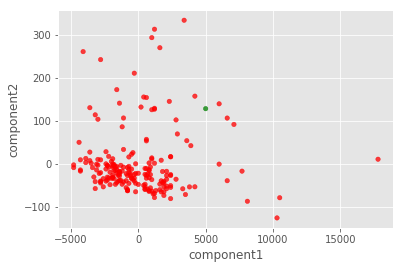

In [16]:
# Since we transformed via PCA, we no longer have column names; but we know we
# are in `principal-component` space, so we'll just define the coordinates accordingly:
ax = drawVectors(T, pca.components_, df.columns.values, plt, scaleFeatures)
T  = pd.DataFrame(T)

T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c=labels, alpha=0.75, ax=ax)

plt.show()